In [1]:
library(Seurat)

library(dplyr)
library(glue)
library(ggplot2)
library(patchwork)
library(cowplot)
library(stringr)
library(tidyr)
library("dplyr")
library(velocyto.R)
library(stringr)
library(SeuratWrappers)
library(DAseq)
load("6_18.RData")


Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'glue'


The following object is masked from 'package:dplyr':

    collapse



Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack




In [2]:
target_genes=c('Ckap4','Fam49a','Epha1','Meis1','Coro2a','Pafah1b3','Il10ra','Socs3','Ahnak','Slc16a3','Atp8b2','Ccl5','Cd22', 'Mag','6530418L21Rik','Bach2','Dapk1','Pdcd1','Dab2','Gpr132','Slc2a3','Trac','Serpinf1','A930004D18Rik','Cd28','Lrrc16a','Ceacam19', 'Pvrl2','Coro2a','1500009L16Rik','Ak1','Tspan17','Nenf','Vldlr','Ak1','Slc14a1','Gcnt2','Pdzk1ip1','Cd74','Ahnak','AI607873','Pkd1l2','Tgm2','Grap2','Dse','Pafah1b3','Dbn1','Dbn1','Hmga2','Bach2','Mpz')

Warning message in DoHeatmap(merged_obj, features = target_genes, slot = "data"):
"The following features were omitted as they were not found in the data slot for the RNA assay: AI607873, Pvrl2, Lrrc16a, 6530418L21Rik"
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



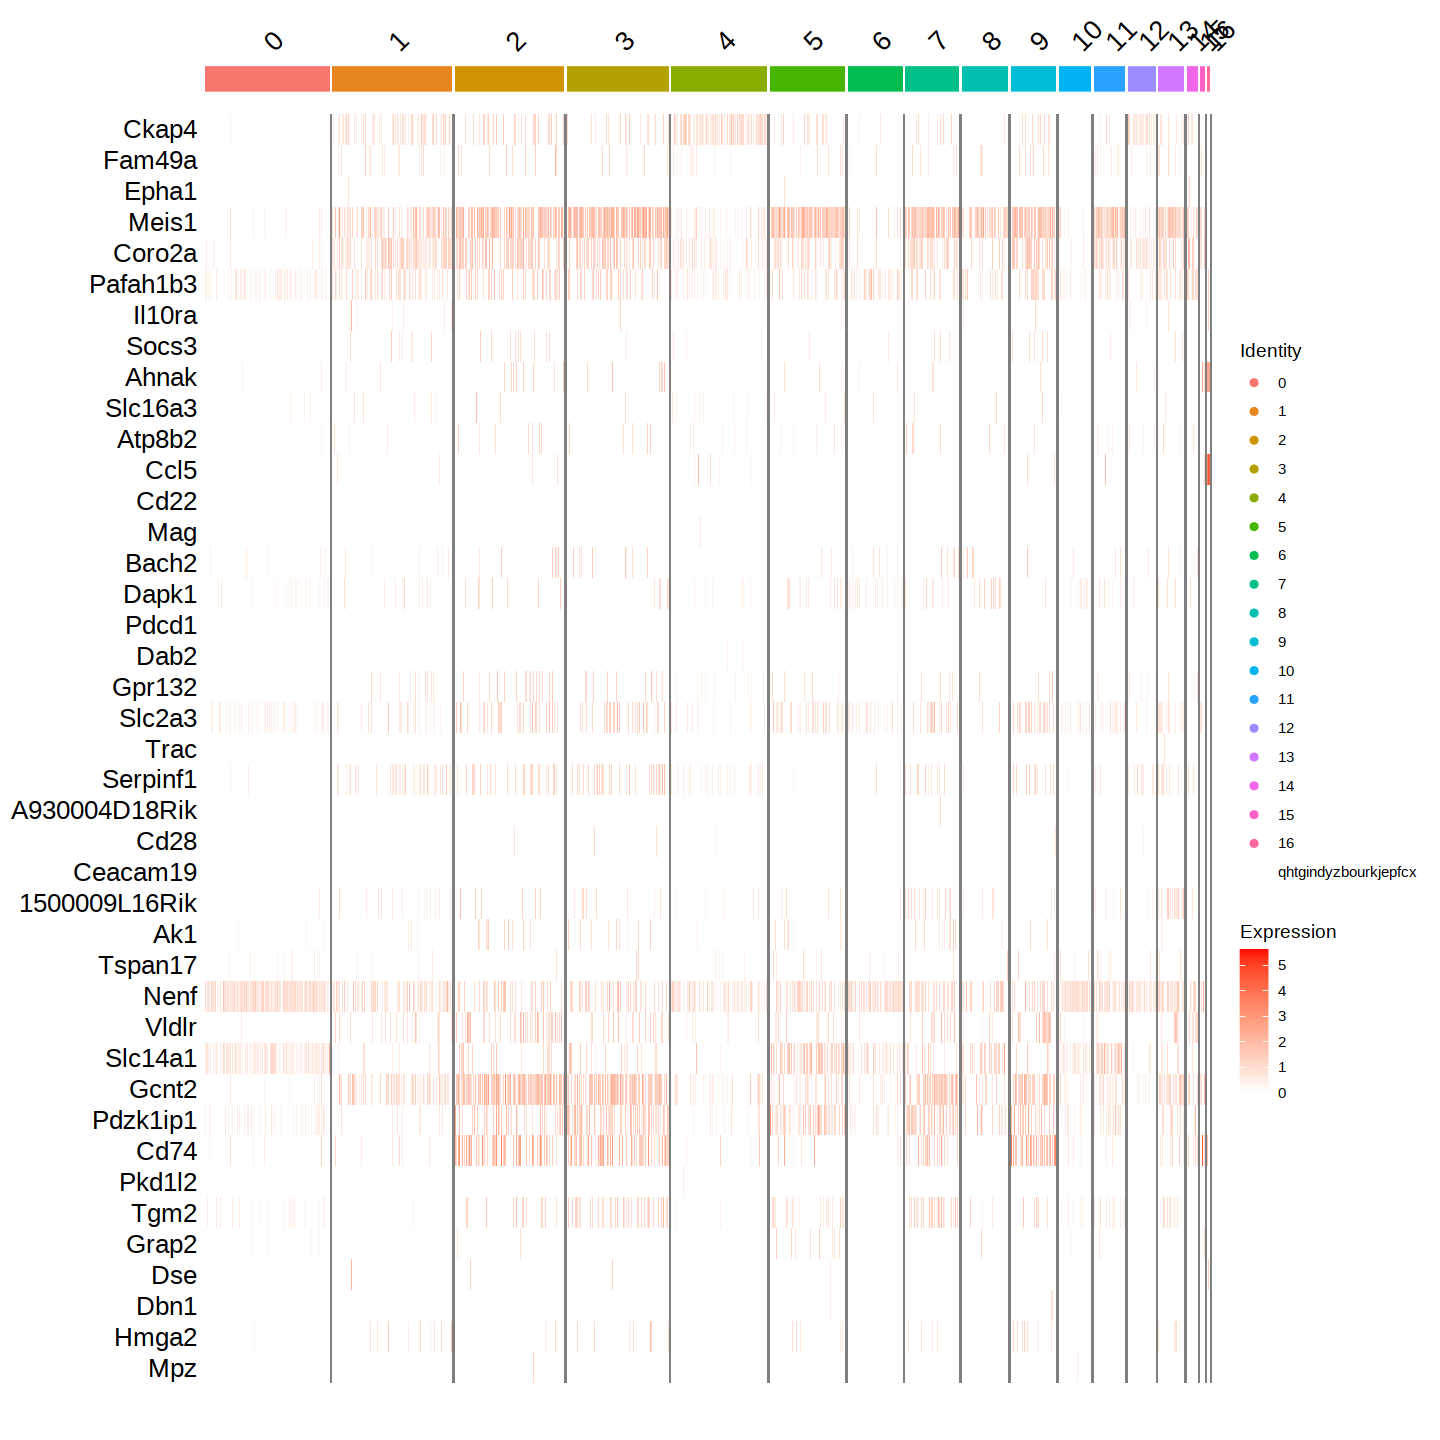

In [3]:
options(repr.plot.width = 12, repr.plot.height = 12)

DoHeatmap(merged_obj, features = target_genes,slot ="data")+theme(axis.text.y = element_text(face="plain", color="black", 
                           size=15, angle=0))+scale_fill_gradient2(low = "blue", high = "red",midpoint=0)

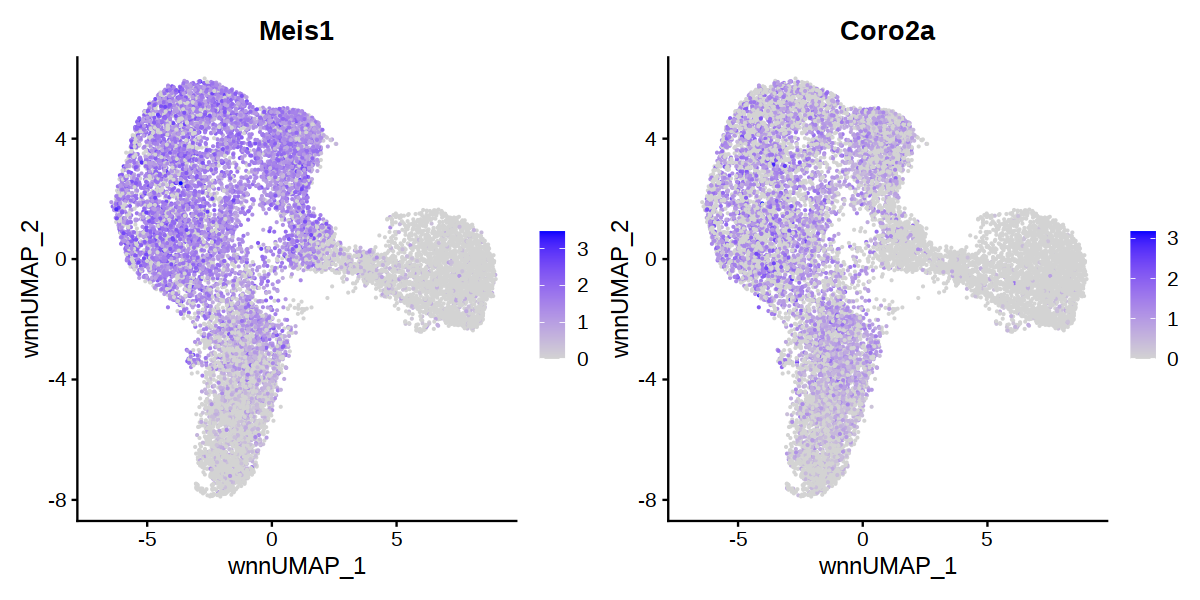

In [4]:
options(repr.plot.width = 10, repr.plot.height = 5)
FeaturePlot(merged_obj, features = c("Meis1","Coro2a"), reduction = 'wnn.umap')

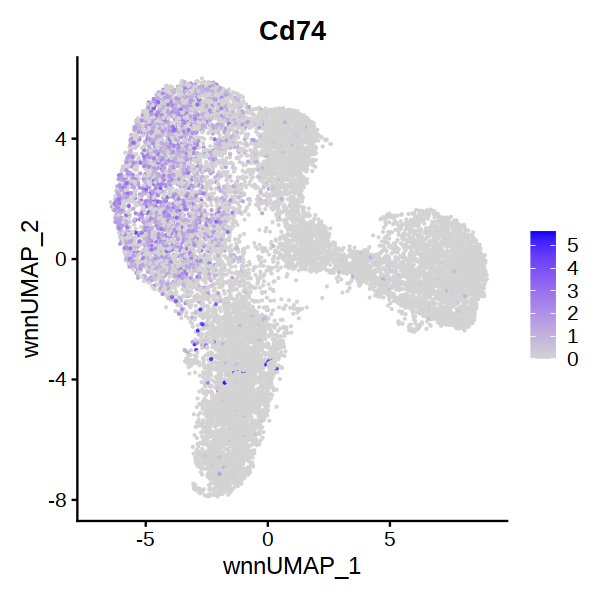

In [56]:
options(repr.plot.width = 5, repr.plot.height = 5)
FeaturePlot(merged_obj, features = "Cd74", reduction = 'wnn.umap')

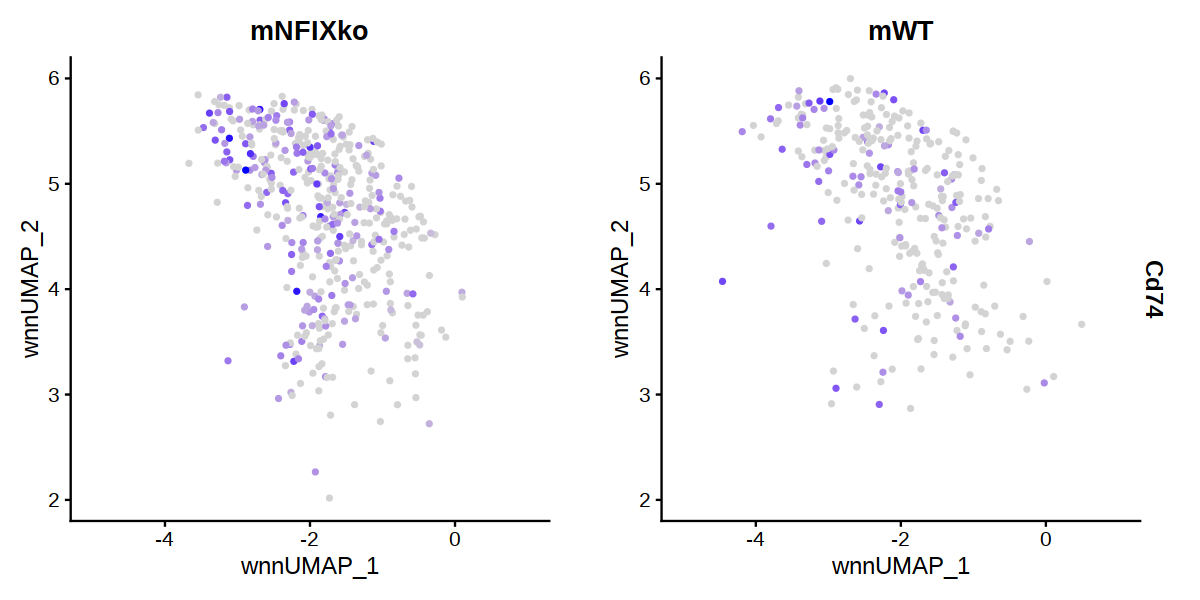

In [68]:
options(repr.plot.width = 10, repr.plot.height = 5)
FeaturePlot(subset(merged_obj,ident="7"), features = "Cd74", reduction = 'wnn.umap',split.by="orig.ident",min.cutoff=0,max.cutoff=6,slot="data")

In [5]:
deg=c("Gcnt2","Cd74","Vldlr","Meis1","Pdzk1ip1","Tgm2","Slc14a1","Ahnak","Ccl5")

In [6]:
tail(merged_obj)

,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,percent.mt,RNA.weight,ADT.weight,wsnn_res.1,seurat_clusters,Blood_pred,BM_pred,Bone_pred,id
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
mNFIXko_TTTGGTTGTCTTGCTC-1,mNFIXko,6319,2424,83,8,3.307485,0.124806775,0.8751932,1,1,1,1,1,reference
mNFIXko_TTTGGTTGTGGCAACA-1,mNFIXko,11909,3372,134,8,2.645058,0.091901015,0.9080990,1,1,1,1,1,reference
mNFIXko_TTTGGTTTCAACACCA-1,mNFIXko,7124,2548,84,7,4.239191,0.415626759,0.5843732,5,5,5,Megakaryocyte,5,reference
mNFIXko_TTTGGTTTCGATACGT-1,mNFIXko,4842,1997,84,8,3.283767,0.389039448,0.6109606,3,3,3,Hematopoietic Stem Cell,3,reference
mNFIXko_TTTGGTTTCTCCAAGA-1,mNFIXko,6518,2319,42,7,4.065664,0.002965497,0.9970345,9,9,9,9,9,reference
mNFIXko_TTTGTTGCAAGTGGGT-1,mNFIXko,20980,4516,126,8,2.936130,0.300945547,0.6990545,4,4,Natural Killer Cell,Stage I Neutrophil,Granulocyte,reference
mNFIXko_TTTGTTGCACGCTATA-1,mNFIXko,4128,1800,248,8,4.215116,0.276211692,0.7237883,3,3,3,Hematopoietic Stem Cell,3,reference
mNFIXko_TTTGTTGCAGTAACCT-1,mNFIXko,9025,3086,58,8,3.235457,0.378029126,0.6219709,6,6,6,Stage I Neutrophil,6,reference
mNFIXko_TTTGTTGCATCGGAGA-1,mNFIXko,5738,2165,145,8,4.444057,0.206763377,0.7932366,9,9,9,9,9,reference


In [7]:
WT <- WhichCells(merged_obj, subset = orig.ident = 'mWT')
KO <- WhichCells(merged_obj,  orig.ident = 'mNFIXko')
hm1 <- DoHeatmap(merged_obj, cells = WT)
hm2 <- DoHeatmap(merged_obj, cells = KO)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:50: unexpected '='
1: WT <- WhichCells(merged_obj, subset = orig.ident =
                                                     ^


In [8]:
WT=subset(x = merged_obj, subset  = orig.ident == 'mWT')
KO=subset(x = merged_obj, subset  = orig.ident == 'mNFIXko')


Warning message in DoHeatmap(merged_obj, features = deg, slot = "scale.data"):
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Meis1"
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



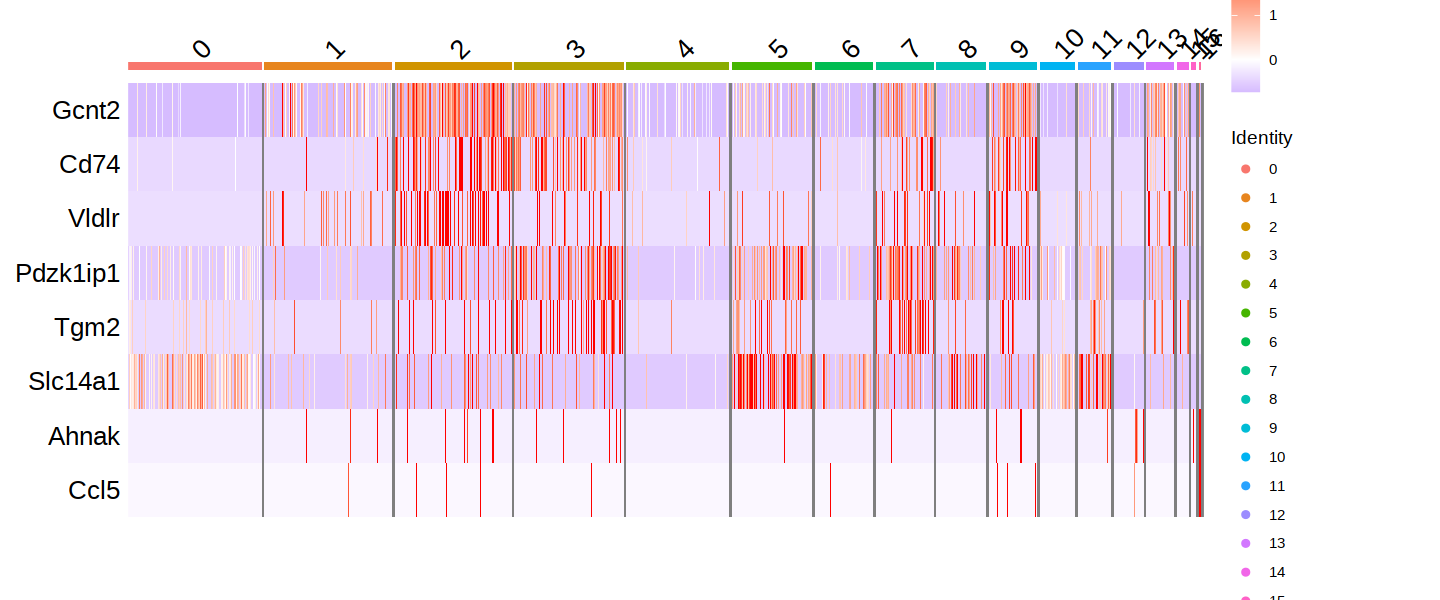

In [16]:
options(repr.plot.width = 12, repr.plot.height = 5)

DoHeatmap(merged_obj, features = deg,slot ="scale.data")+theme(axis.text.y = element_text(face="plain", color="black", 
                                                                                    
                           size=15, angle=0))+scale_fill_gradient2(low = "blue", high = "red",midpoint=0)

In [ ]:
devtools::install_github("elliefewings/DoMultiBarHeatmap")


In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)
FeaturePlot(merged_obj, features = c("Meis1","Coro2a"), reduction = 'wnn.umap')

In [12]:
library(Scillus)

Warning message in set_colors(anno_colors[[i]], length(l)):
"Number of colors required exceeds palette capacity. RdYlBu spectrum will be used instead."


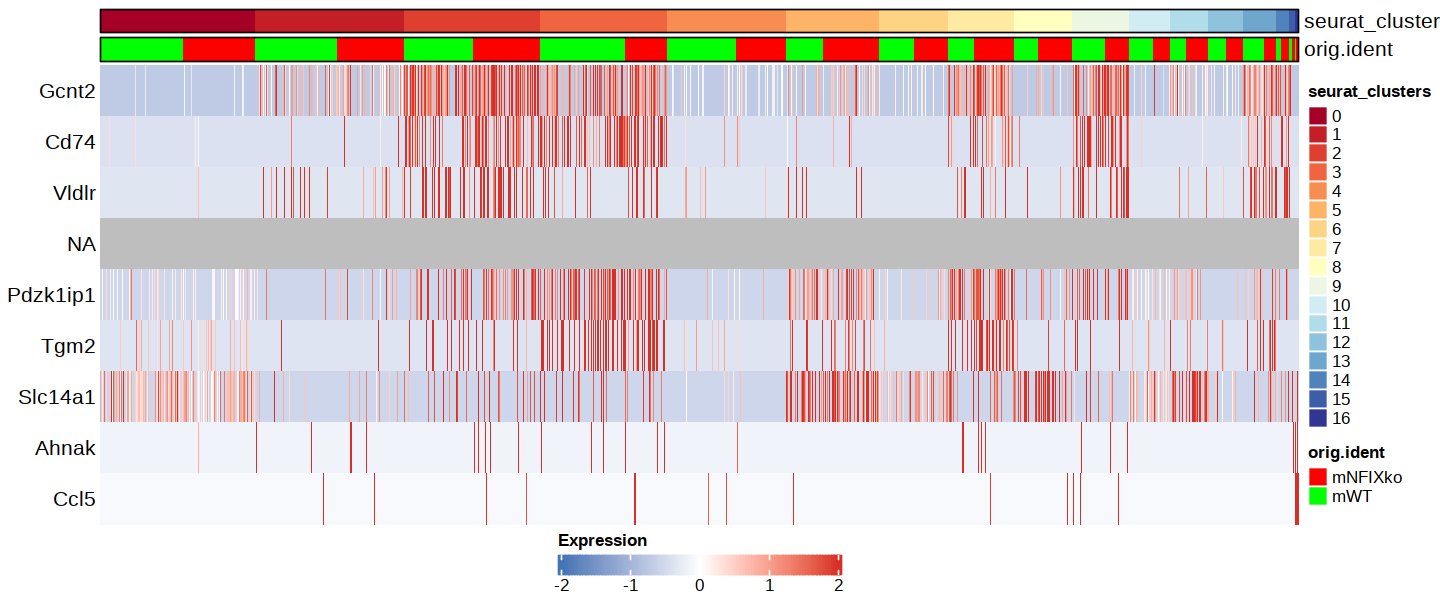

In [14]:
plot_heatmap(dataset = merged_obj, 
              markers = deg,
              sort_var = c("seurat_clusters"),
              anno_var = c("seurat_clusters","orig.ident"),
              anno_colors = list("Set2",c("red","green")))

In [30]:
new.data <- GetAssayData(merged_obj[["RNA"]], slot = "data")
new.data <- as.matrix(new.data)
new.data <- SetAssayData(merged_obj, slot = "scale.data", new.data = new.data, assay = "RNA")


Warning message in set_colors(anno_colors[[i]], length(l)):
"Number of colors required exceeds palette capacity. RdYlBu spectrum will be used instead."


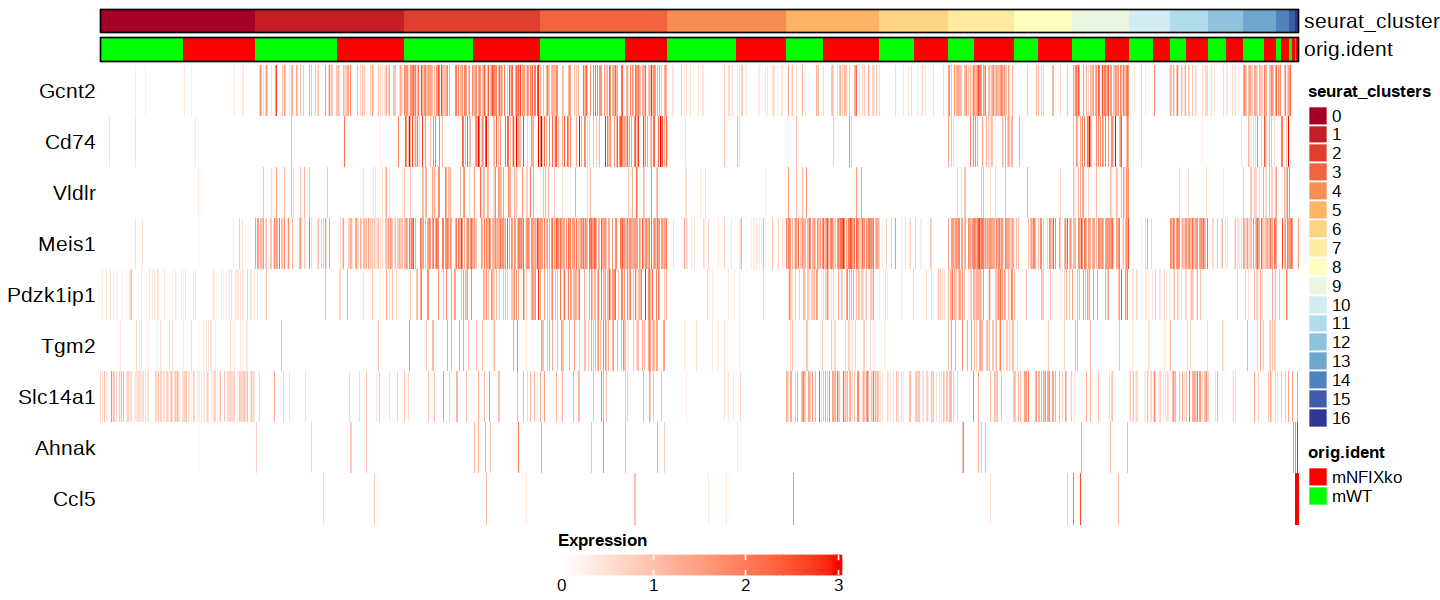

In [24]:
plot_heatmap(dataset = new.data, 
              markers = deg,
              sort_var = c("seurat_clusters"),
              anno_var = c("seurat_clusters","orig.ident"),
              anno_colors = list("Set2",c("red","green")),
              hm_colors = c("white","red"),
              hm_limit = c(0,3)
            
            )

In [43]:
library(RColorBrewer)
pal <- tibble(var = c("sample", "group","seurat_clusters"),
              pal = c("Set2","Set1","Paired"))
# new.data = RenameAssays(object = new.data,RNA="integrated")


plot_measure(dataset = new.data, 
             measures = "Nfix", 
             group_by = "seurat_clusters", 
             split_by = "orig.ident")

Warning message in set_colors(pal, length(unique(dataset[[group_by]][[1]]))):
"Number of colors required exceeds palette capacity. RdYlBu spectrum will be used instead."


ERROR: Error in get_measure_data(dataset = dataset, measures = measures, return_df = FALSE): trying to get slot "data" from an object of a basic class ("NULL") with no slots


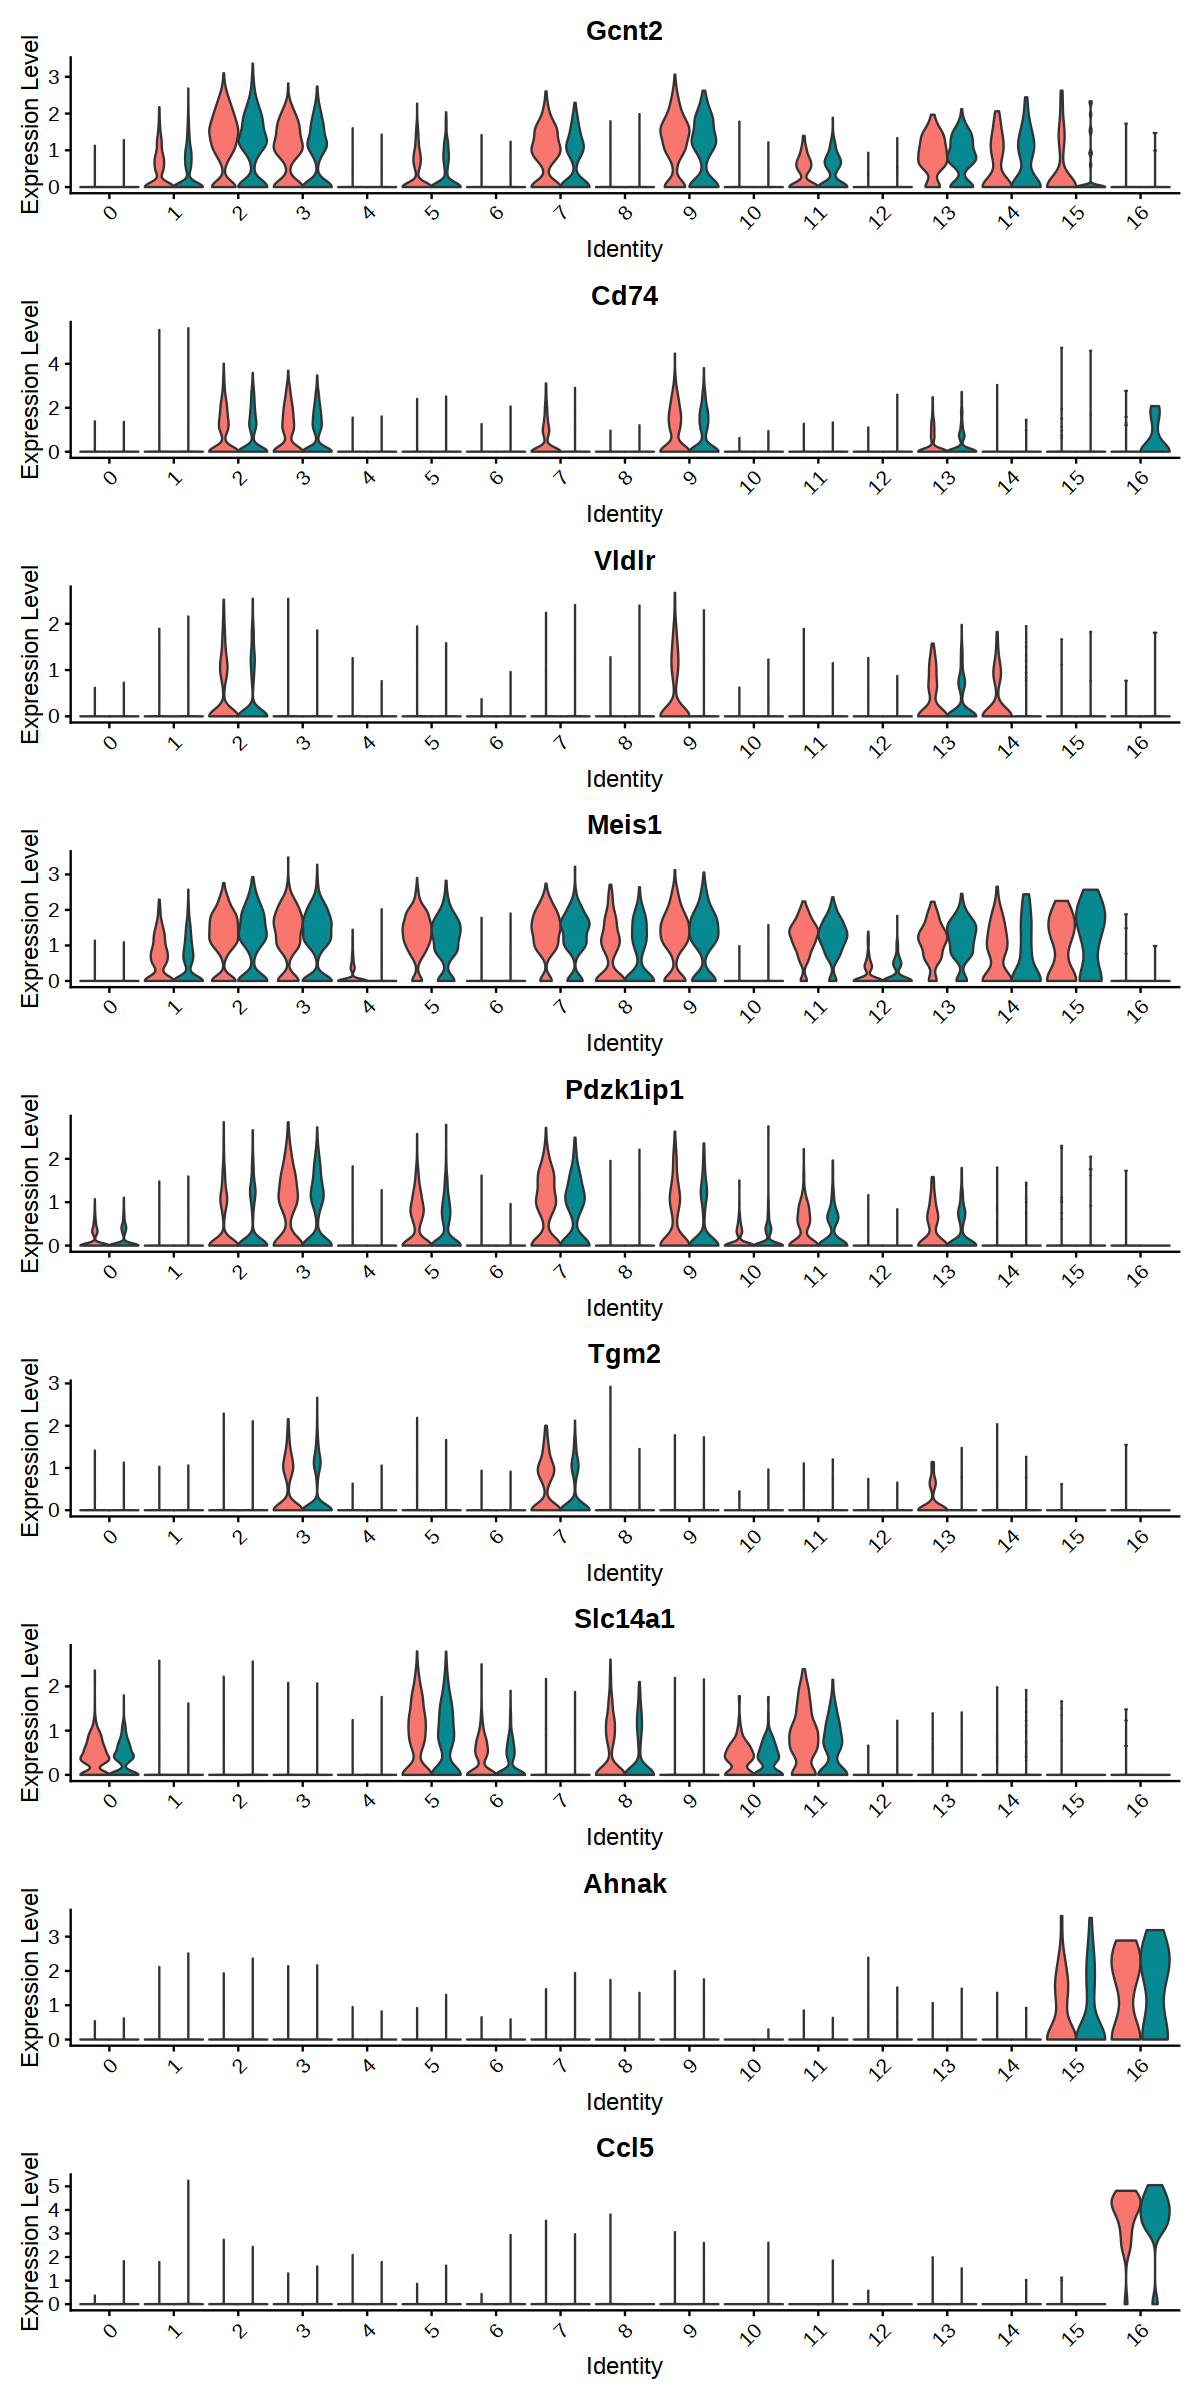

In [51]:
options(repr.plot.width = 10, repr.plot.height = 20)

VlnPlot(merged_obj, features = deg, group.by="seurat_clusters",split.by = "orig.ident",ncol=1, pt.size = 0)

ggsave("deg.plot.pdf",height=20,width=10)

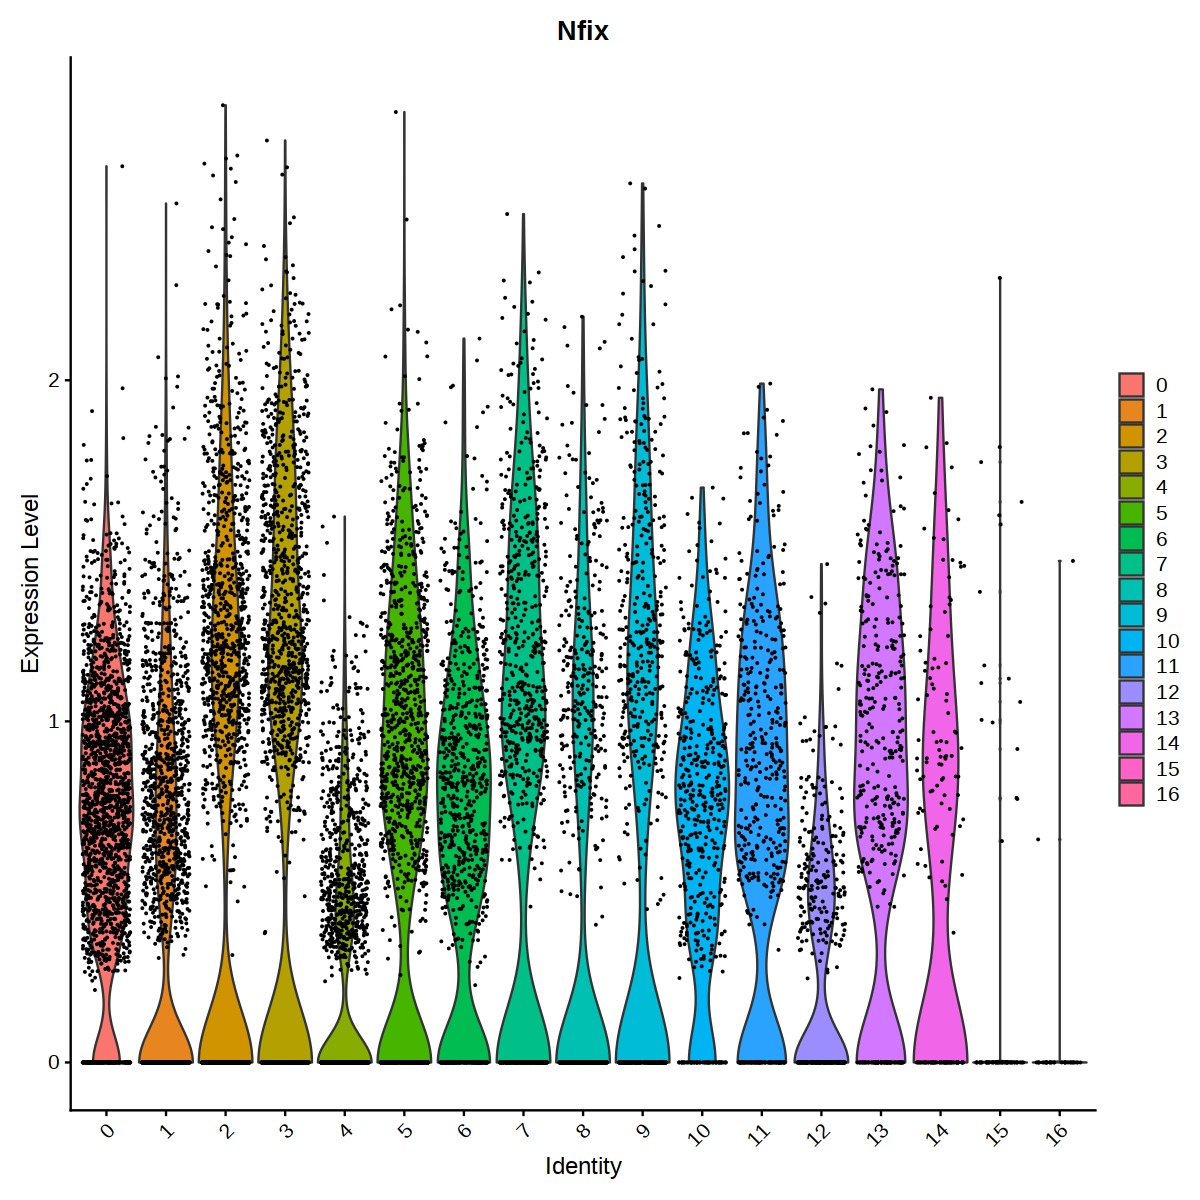

In [73]:
options(repr.plot.width = 10, repr.plot.height = 10)

VlnPlot(merged_obj, features = "Nfix", group.by="seurat_clusters")


Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
"All cells have the same value of Cdx1."


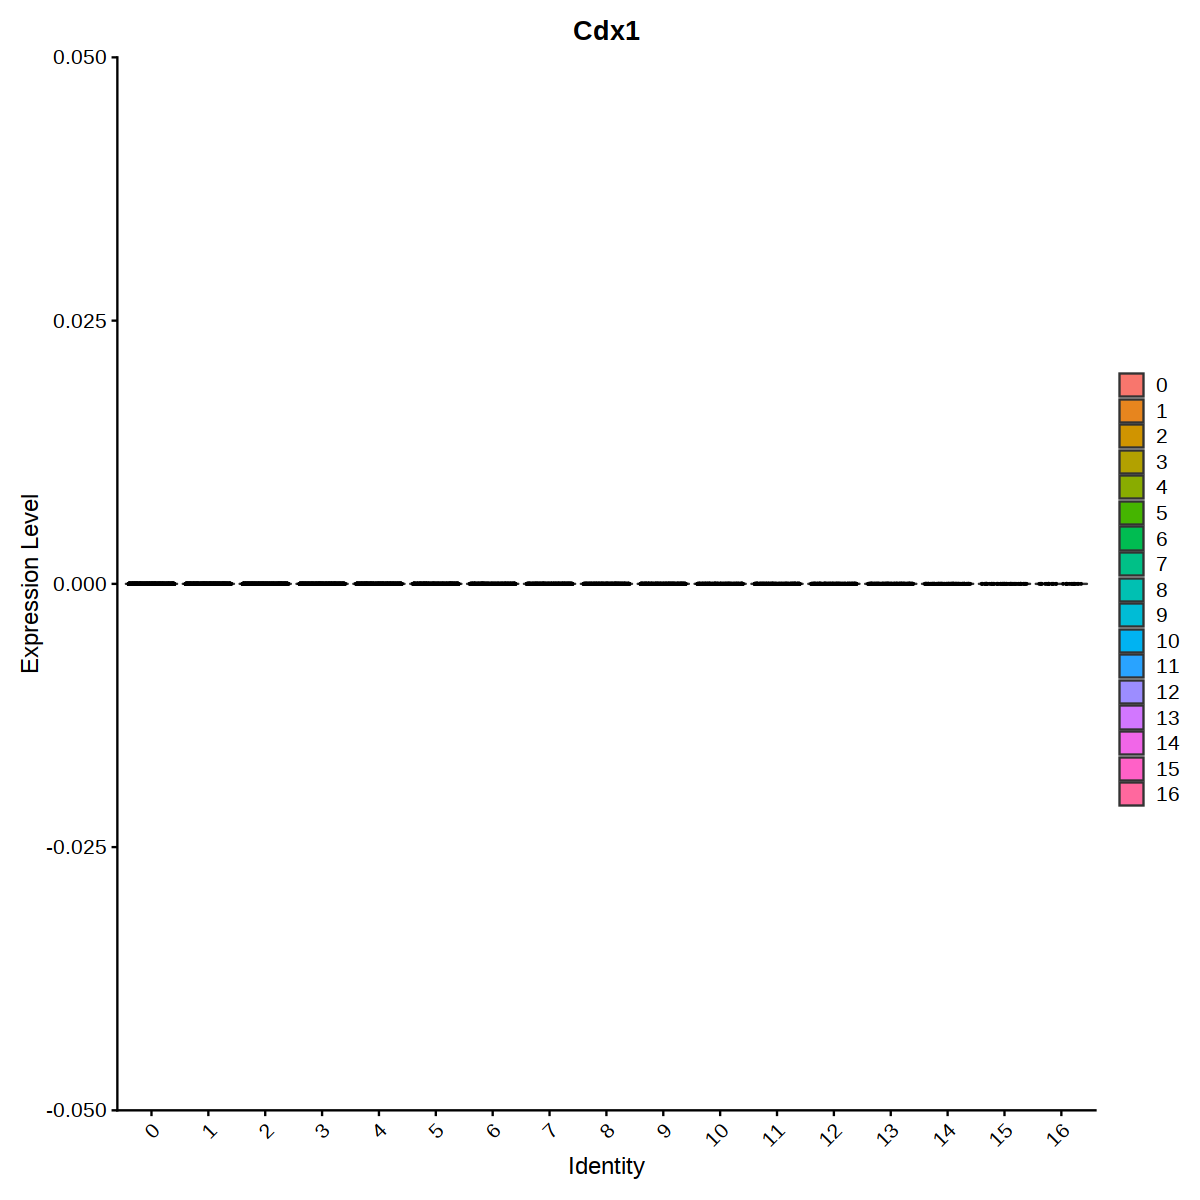

In [75]:
options(repr.plot.width = 10, repr.plot.height = 10)

VlnPlot(merged_obj, features = "Cdx1", group.by="seurat_clusters",slot="data")


Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.ymin` is deprecated. Use `fun.min` instead."
Warning message:
"`fun.ymax` is deprecated. Use `fun.max` instead."


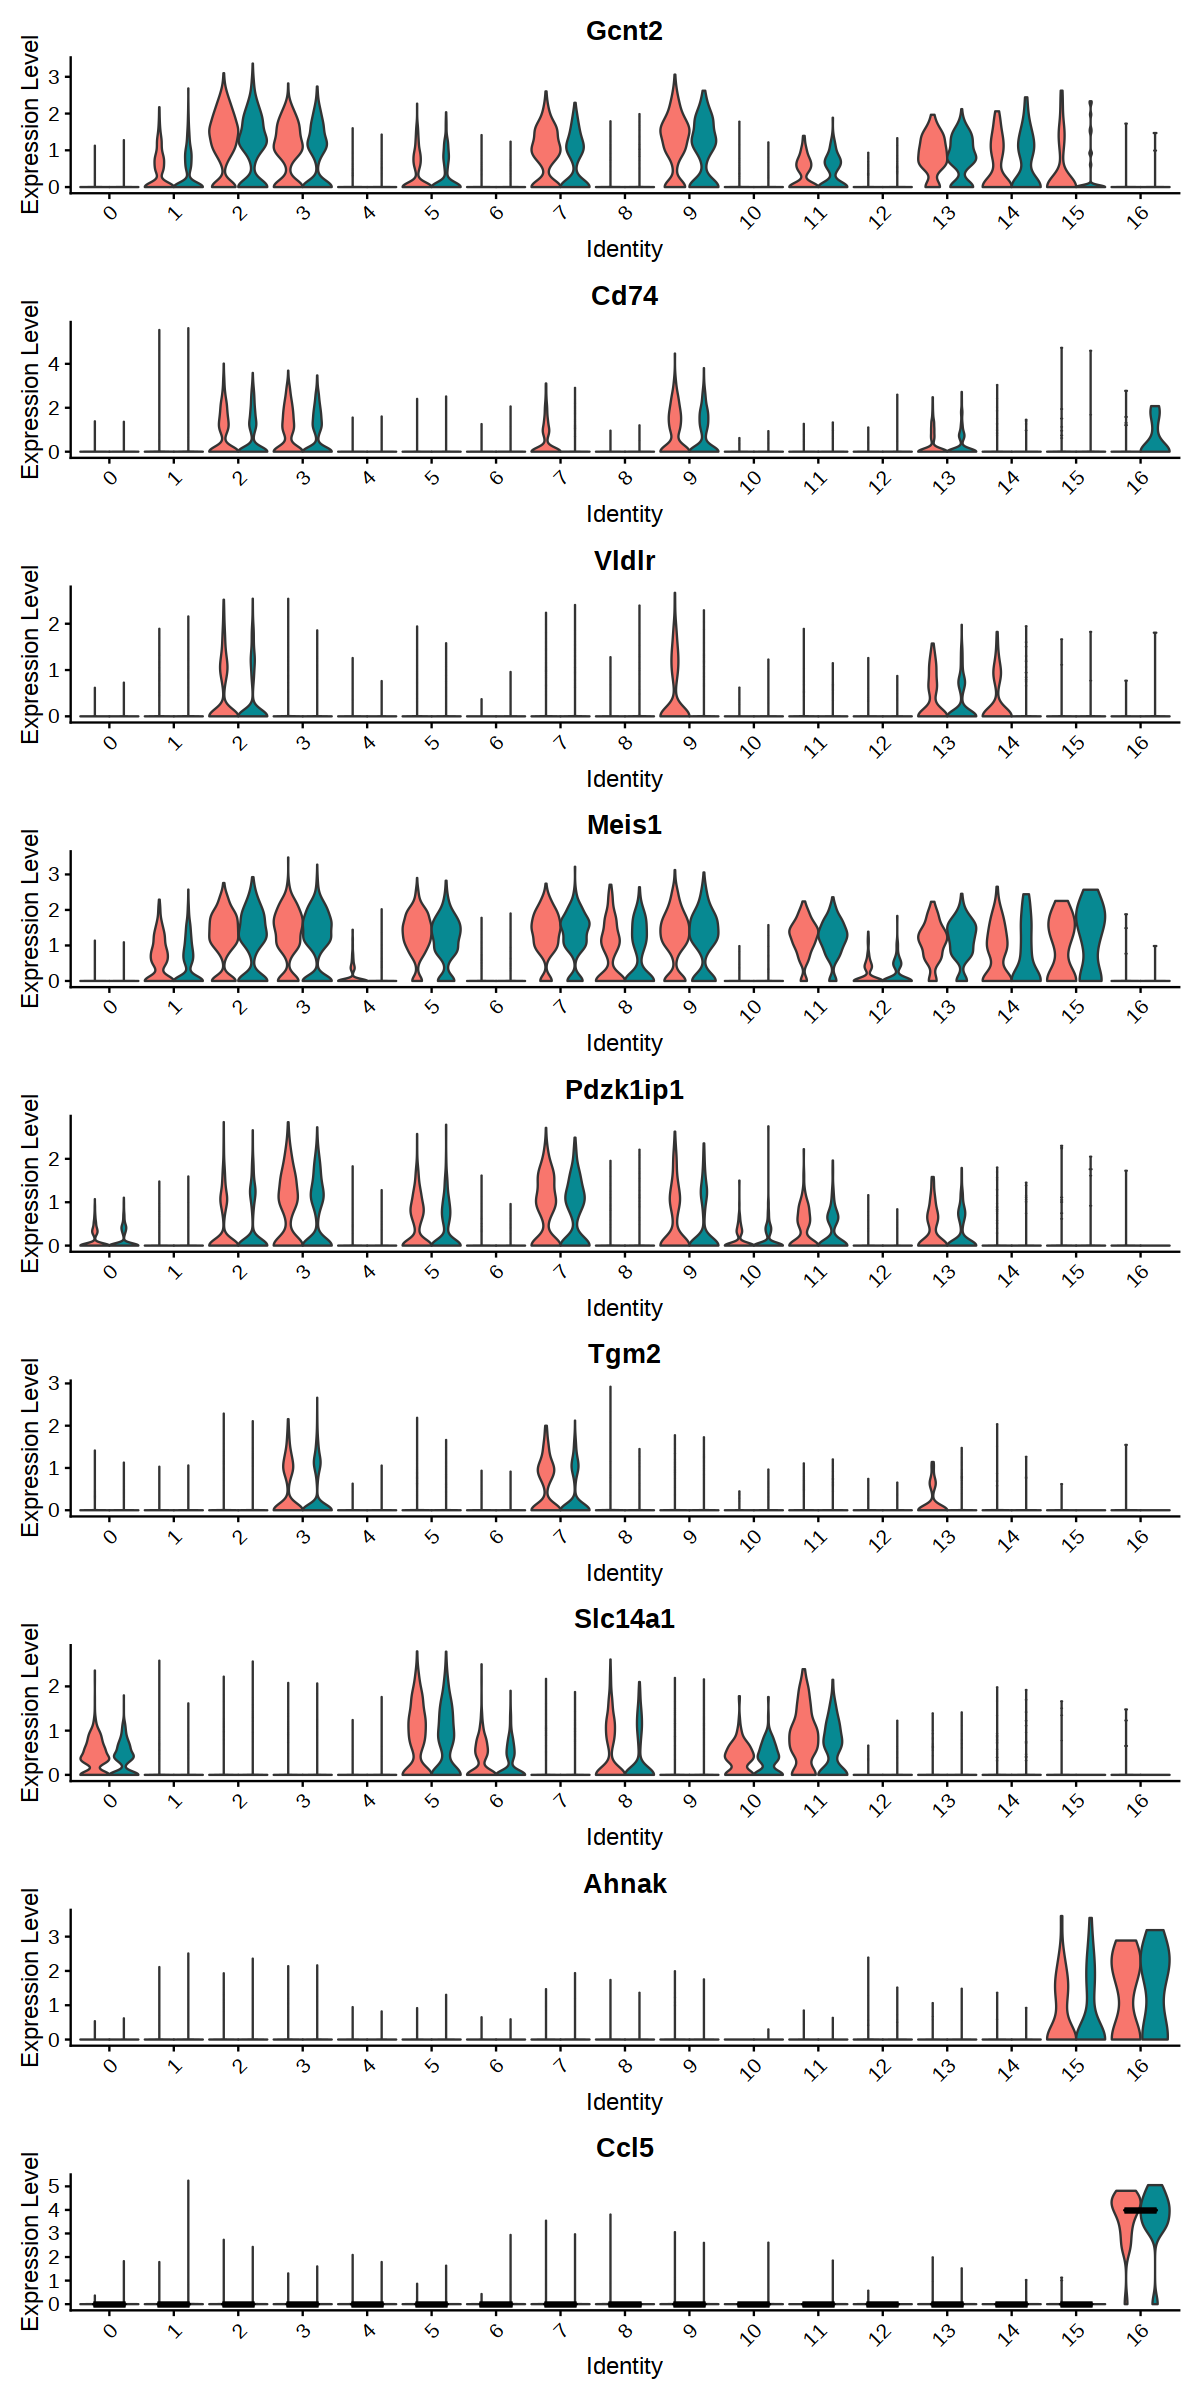

In [52]:
VlnPlot(merged_obj, features = deg, group.by="seurat_clusters",split.by = "orig.ident",ncol=1, pt.size = 0) + 
stat_summary(fun.y = median, fun.ymin = median, fun.ymax = median, geom = "crossbar", width = 0.5)

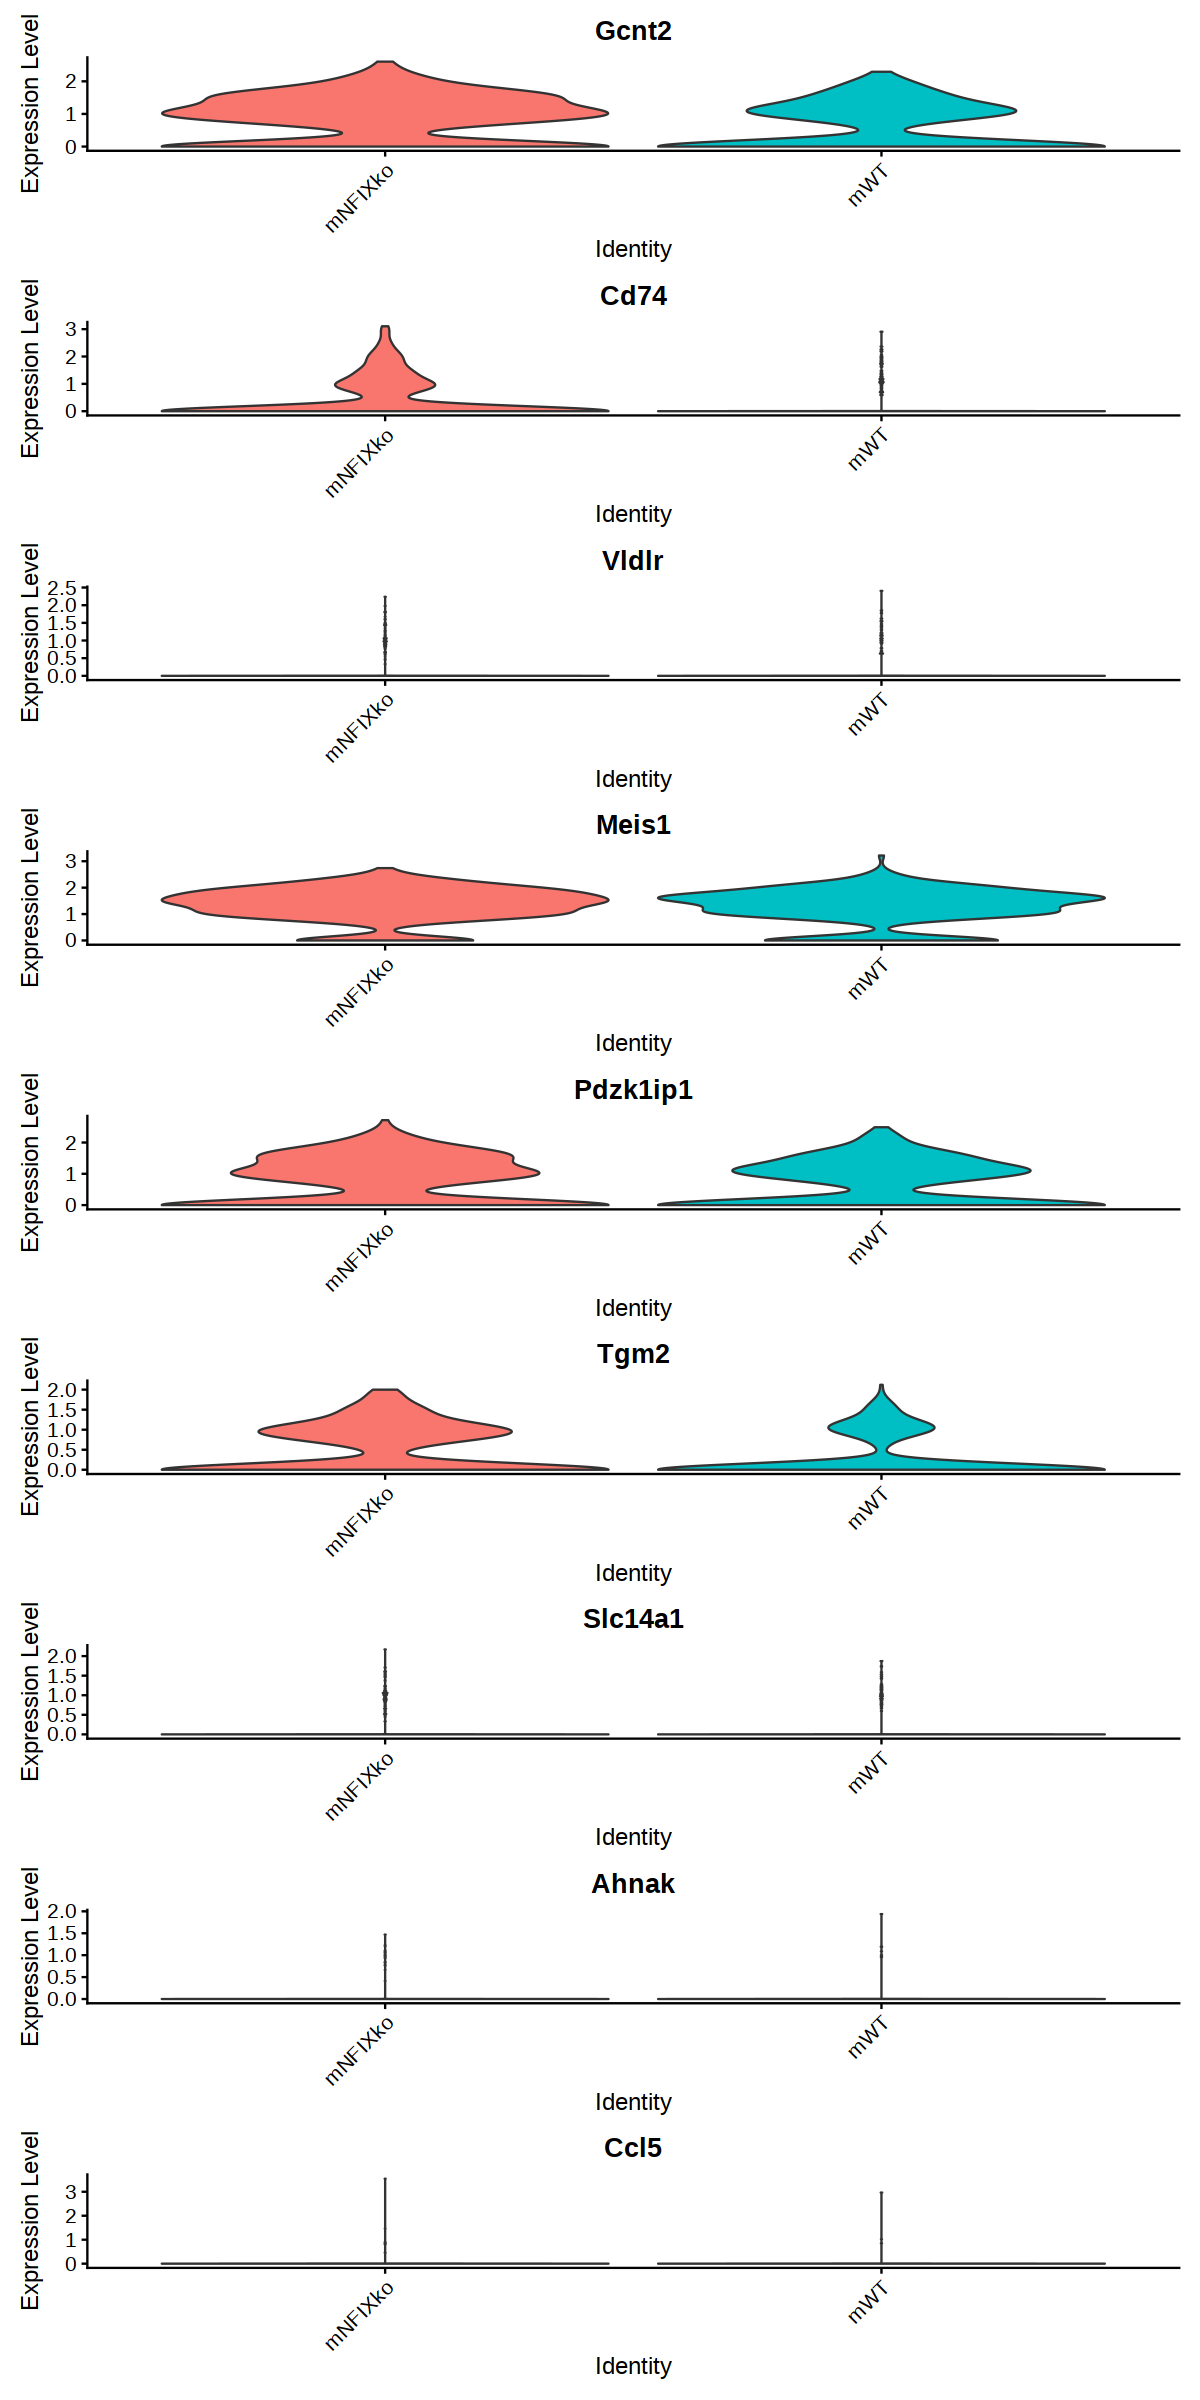

In [54]:

VlnPlot(subset(merged_obj,ident="7"), features = deg, group.by="orig.ident",ncol=1, pt.size = 0)
